### ***PREDICTING STROKE RISK USING PATIENT HEALTH DATA - EXPLORATORY DATA ANALYSIS***

**Exploratory Data Analysis Plan:**
1. Data Profiles and Inferential Statistics

    Objective: Explore summary statistics and basic metrics for all features to understand their distribution and possible anomalies.
    Tasks:
        Calculate basic summary statistics (mean, median, mode, etc.).
        Use Pearson correlation to analyze relationships between features.
        Investigate any outliers or abnormal results in the data.

2. Data Visualization

    Objective: Visualize the distribution of all features and examine relationships between features and the target variable (stroke).
    Tasks:
        Plot histograms and distribution plots for numeric features like age, bmi, and avg_glucose_level.
        Create bivariate plots (scatter plots, box plots, etc.) to explore relationships between features and the target variable.
        Use correlation heatmaps to visualize relationships among features.

3. Feature Selection and Engineering

    Objective: Select features based on relevance to the target variable and apply any necessary transformations or encodings.
    Tasks:
        Identify any categorical variables that need to be one-hot encoded.
        Engineer new features if relevant, or transform existing ones (e.g., binning continuous variables, scaling, normalization).
        Investigate interaction effects between features and the target variable.

In [14]:
#Let's start by importing necessary libraries and loading the data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/Data Science Capstone Two/dataset/stroke_data_cleaned.csv'
stroke_data_cleaned = pd.read_csv(file_path)

# Show the first few rows of the dataset to inspect its structure
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# Verify missing values are handled and no duplicates remain
stroke_data_cleaned.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
# Verify missing values are handled and no duplicates remain
stroke_data_cleaned.shape[0]

5110

In [62]:
# Convert categorical columns to numeric using one-hot encoding
stroke_data_encoded = pd.get_dummies(stroke_data_cleaned, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [64]:
# Step 1: Data Profiles and Inferential Statistics
# Summary statistics for numeric features
summary_stats = stroke_data_cleaned.describe()

# Pearson correlation to identify relationships between features
correlation_matrix = stroke_data_encoded.corr()

# Display the correlation matrix

print(correlation_matrix)

                                      id       age  hypertension  \
id                              1.000000  0.003538      0.003550   
age                             0.003538  1.000000      0.276398   
hypertension                    0.003550  0.276398      1.000000   
heart_disease                  -0.001296  0.263796      0.108306   
avg_glucose_level               0.001092  0.238171      0.174474   
bmi                             0.005555  0.324296      0.158293   
stroke                          0.006388  0.245257      0.127904   
gender_Male                     0.001776 -0.027623      0.021275   
gender_Other                    0.012984 -0.010659     -0.004597   
ever_married_Yes                0.013690  0.679125      0.164243   
work_type_Never_worked          0.005459 -0.078653     -0.021608   
work_type_Private               0.023698  0.116534     -0.005413   
work_type_Self-employed        -0.019956  0.327989      0.115442   
work_type_children             -0.013939 -0.6342

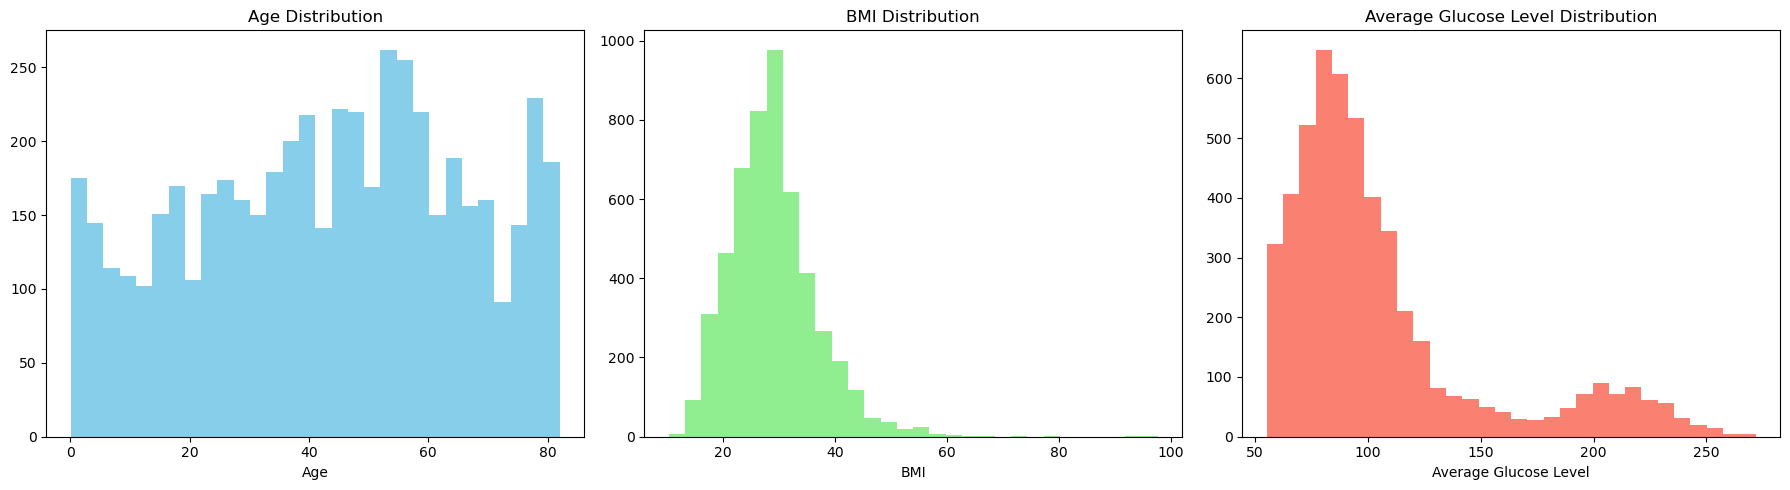

In [66]:
# Step 2: Data Visualization
# Histograms for numeric features (age, bmi, avg_glucose_level)
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(stroke_data_encoded['age'], bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

plt.subplot(1, 3, 2)
plt.hist(stroke_data_encoded['bmi'], bins=30, color='lightgreen')
plt.title('BMI Distribution')
plt.xlabel('BMI')

plt.subplot(1, 3, 3)
plt.hist(stroke_data_encoded['avg_glucose_level'], bins=30, color='salmon')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.tight_layout()
plt.show()

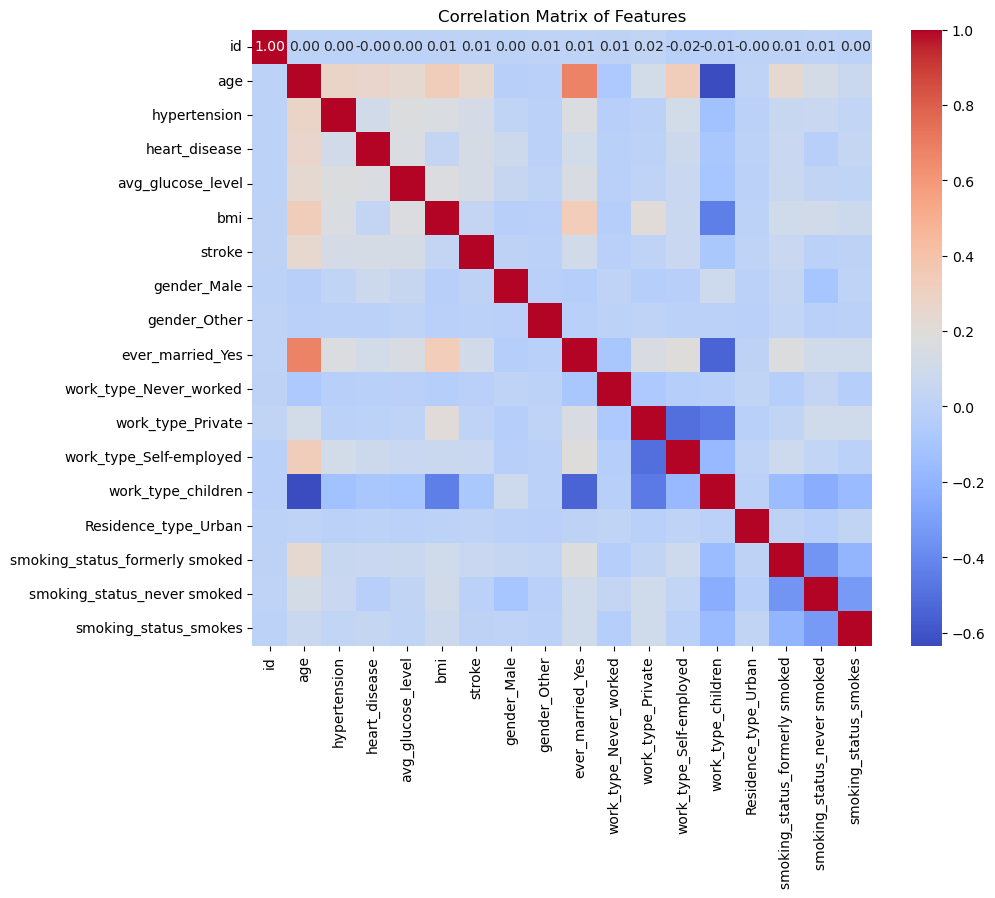

In [68]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

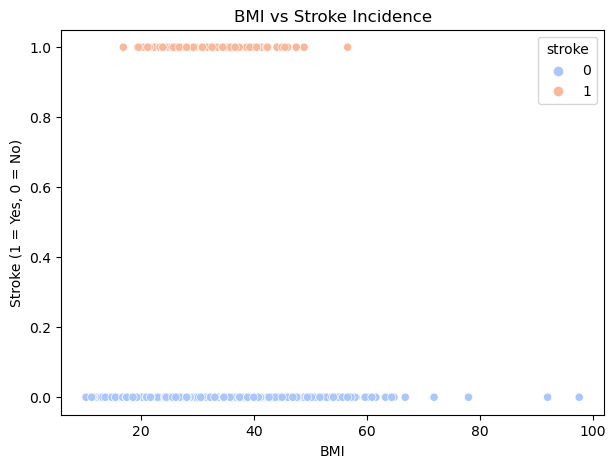

In [70]:
# Scatter plot: BMI vs Stroke
plt.figure(figsize=(7, 5))
sns.scatterplot(x='bmi', y='stroke', data=stroke_data_encoded, hue='stroke', palette='coolwarm')
plt.title('BMI vs Stroke Incidence')
plt.xlabel('BMI')
plt.ylabel('Stroke (1 = Yes, 0 = No)')
plt.show()

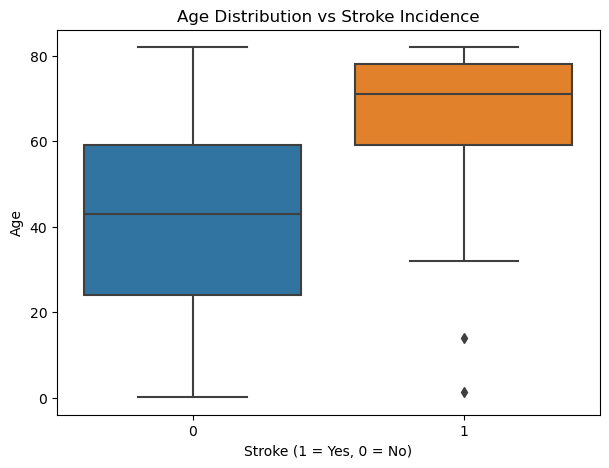

In [72]:
# Box plot: Age vs Stroke
plt.figure(figsize=(7, 5))
sns.boxplot(x='stroke', y='age', data=stroke_data_encoded)
plt.title('Age Distribution vs Stroke Incidence')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

In [74]:
summary_stats, correlation_matrix

(                 id          age  hypertension  heart_disease  \
 count   5110.000000  5110.000000   5110.000000    5110.000000   
 mean   36517.829354    43.226614      0.097456       0.054012   
 std    21161.721625    22.612647      0.296607       0.226063   
 min       67.000000     0.080000      0.000000       0.000000   
 25%    17741.250000    25.000000      0.000000       0.000000   
 50%    36932.000000    45.000000      0.000000       0.000000   
 75%    54682.000000    61.000000      0.000000       0.000000   
 max    72940.000000    82.000000      1.000000       1.000000   
 
        avg_glucose_level          bmi       stroke  
 count        5110.000000  5110.000000  5110.000000  
 mean          106.147677    28.862035     0.048728  
 std            45.283560     7.699562     0.215320  
 min            55.120000    10.300000     0.000000  
 25%            77.245000    23.800000     0.000000  
 50%            91.885000    28.100000     0.000000  
 75%           114.090000 

In [107]:
# Step 3: Feature Selection and Engineering

# Bin continuous variable such as age into categories
bins = [0, 18, 45, 60, 100]
labels = ['child', 'adult', 'middle-aged', 'senior']
stroke_data_encoded['age_group'] = pd.cut(stroke_data_cleaned['age'], bins=bins, labels=labels)

In [108]:
# Use StandardScaler() to scale numeric features like 'bmi' and 'avg_glucose_level'
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale selected features
stroke_data_encoded[['bmi', 'avg_glucose_level']] = scaler.fit_transform(stroke_data_encoded[['bmi', 'avg_glucose_level']])

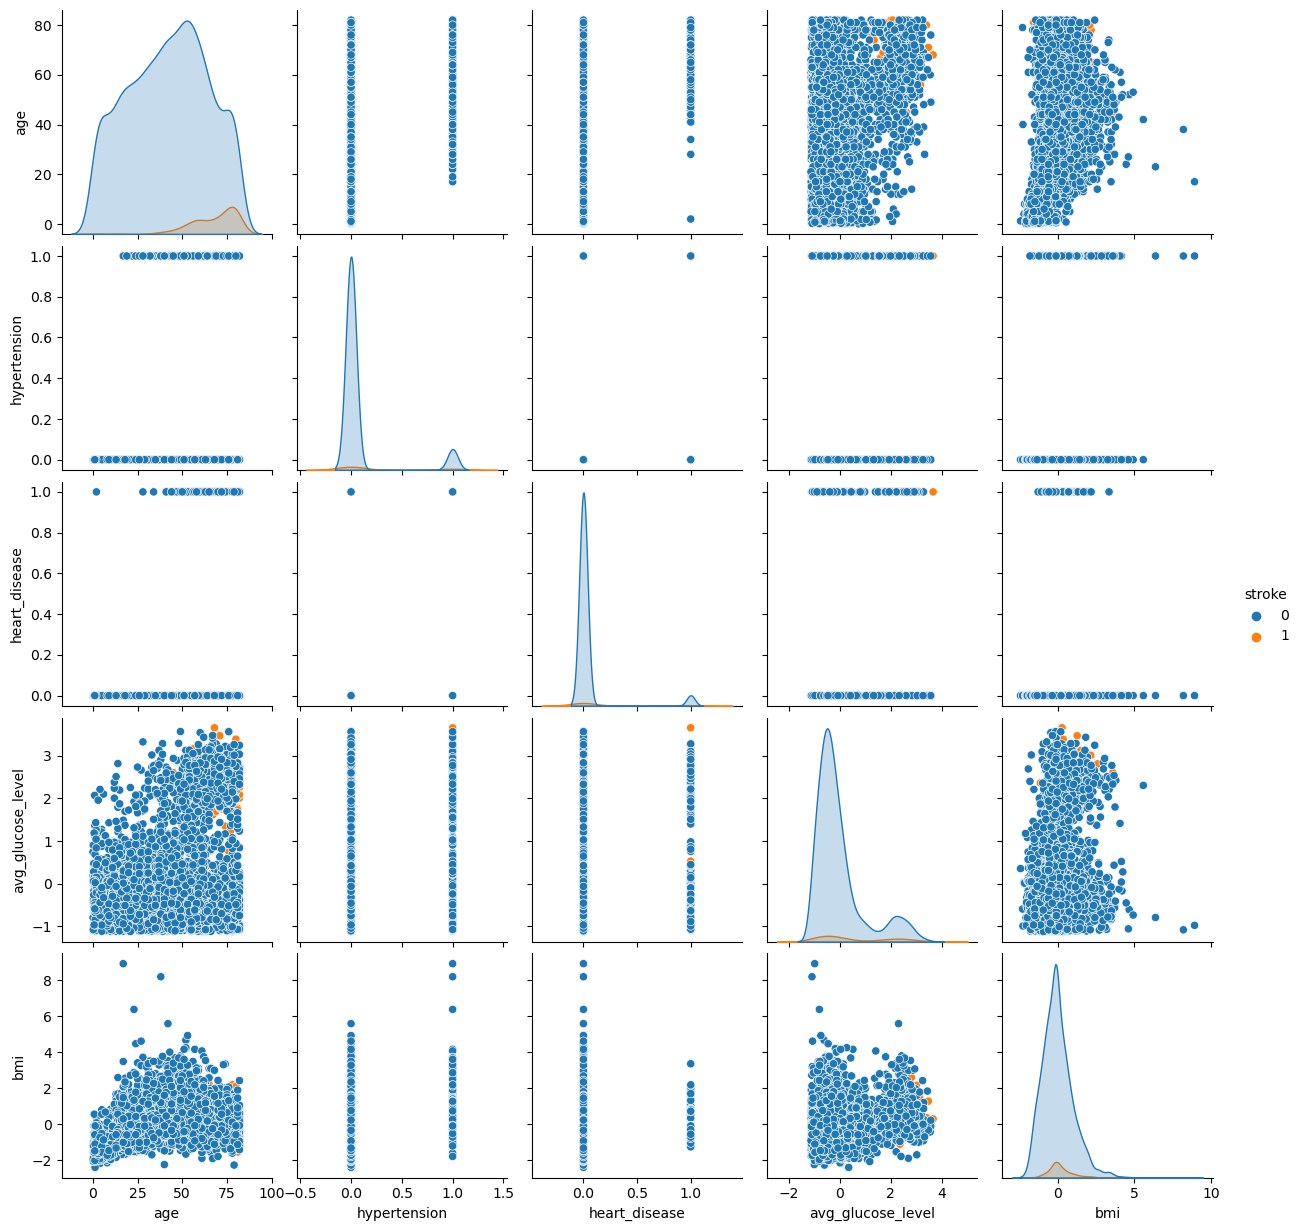

In [120]:
# Investigate Interaction Effects
# Use visual methods to explore relationships and potential interactions between features and the target variable
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

import seaborn as sns
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Visualize potential interactions
selected_features = stroke_data_encoded[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
sns.pairplot(selected_features, hue='stroke')
plt.show()  # Display the plot

In [122]:
# Save 'stroke_data_encoded' as a CSV file
stroke_data_encoded.to_csv('stroke_data_encoded.csv', index=False)